# Exercício PA2-5

Exercício com data de entrega para 11 de novembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
#from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

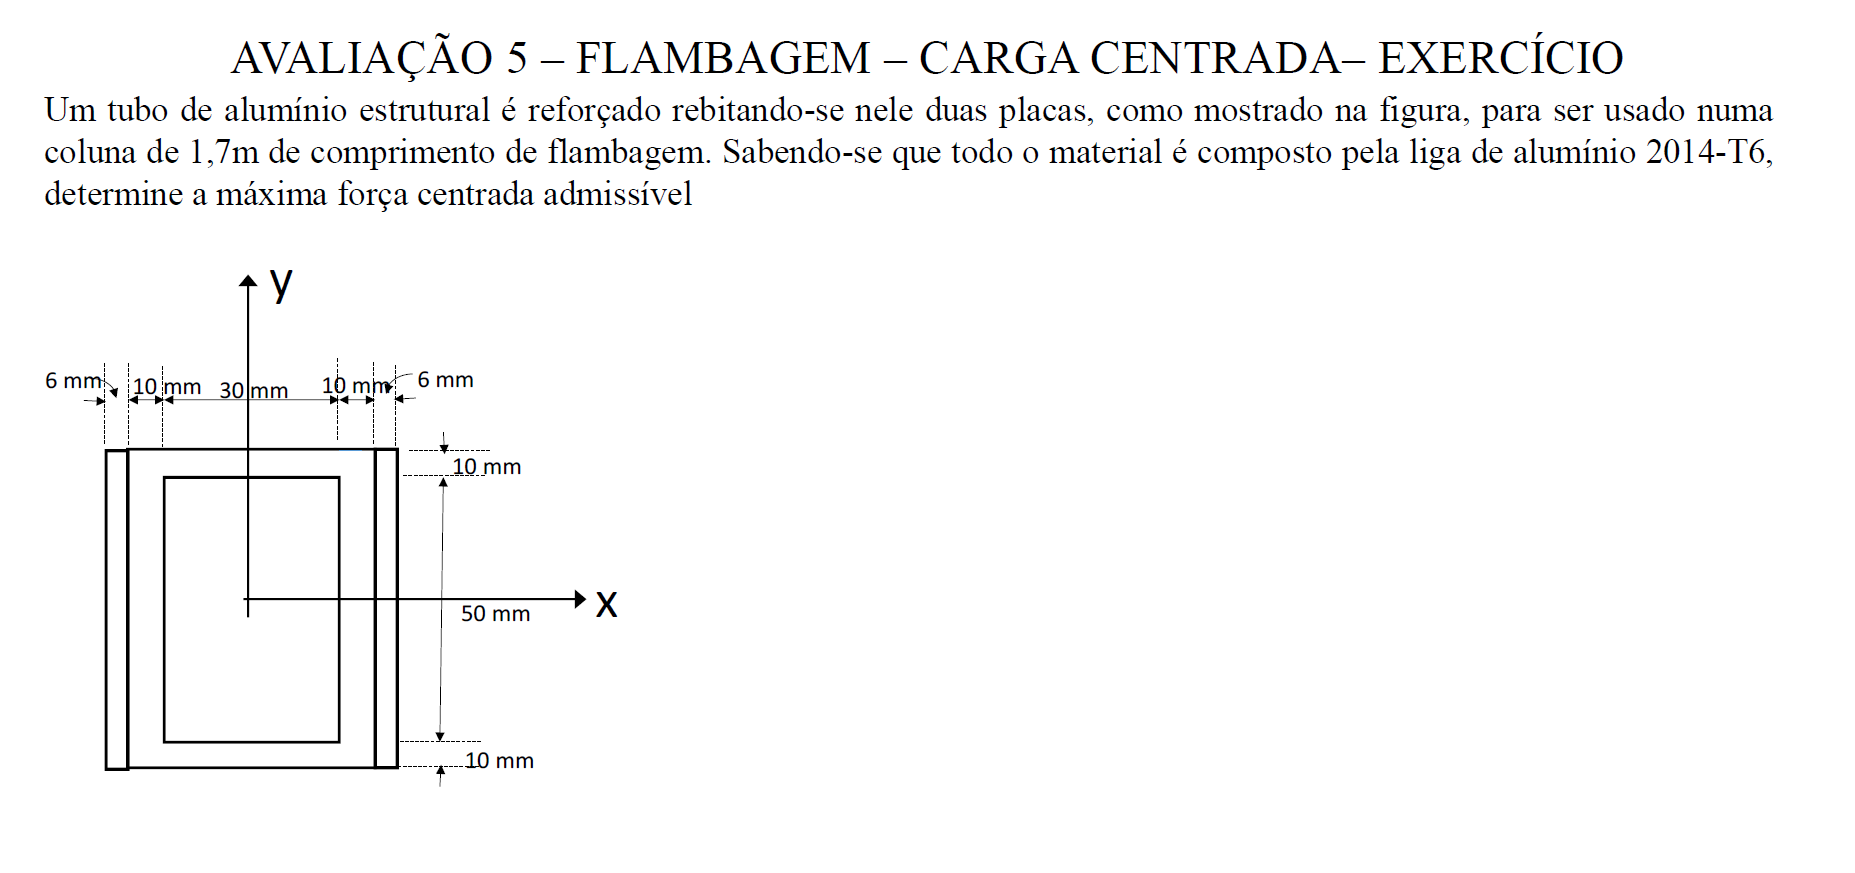

In [2]:
Image("Figuras/PA2-5.png")

# Introdução

O índice de esbeltez de uma coluna é definido por $\frac{L_{e}}{r}$, onde:

* $L_{e}$ é o comprimento efetivo, definido em funcão do tipo de apoio (condições de contorno);

* $r$ é o raio de giração, definido por $r = \sqrt{\frac{I}{A}}$, sendo $I$ o menor momento de inércia da seção transversal e $A$ a área desta seção.

A partir disso, temos como calcular a tensão crítica de flambagem:

\begin{equation*}
    \sigma_{cr} = \frac{\pi^{2}E}{\left(\frac{L_{e}}{r}\right)^{2}}
\end{equation*}

Portanto, quanto maior o índice de esbeltez, menor a tensão crítica admissível. Assim, o maior valor de esbeltez encontrado deverá ser utilizado para verificação à flambagem.

# Solução

No problema, temos que, independente das condições de contorno, o comprimento efetivo de flambagem foi fornecido, sendo $L_{e}=1,7~m=1700~mm$.

A área é:

\begin{equation*}
    A = 62\times 70 - 30\times 50 \therefore
\end{equation*}

\begin{equation*}
    A = 2840~mm^{2}
\end{equation*}

Em relação ao eixo $x$, temos:

\begin{equation*}
    I_{x} = \frac{62\times 70^{3}}{12} - \frac{30\times 50^{3}}{12} =
    \frac{62\times 70^{3} - 30\times 50^{3}}{12} \therefore
\end{equation*}

\begin{equation*}
    I_{x} = \frac{4379000}{3}~mm^{4}
\end{equation*}

Portanto,

\begin{equation*}
    r_{x} = \sqrt{\frac{I_{x}}{A}} = \sqrt{\frac{4379000}{3\times 2840}} =
    \sqrt{\frac{4379000}{8520}} \therefore
\end{equation*}

\begin{equation*}
    r_{x} = 22,67~mm
\end{equation*}

In [3]:
mm,Pa = sp.symbols('mm,Pa',positive=True)
L_e = 1700*mm
A = 62*mm*70*mm - 30*mm*50*mm
I_x = (62*mm*((70*mm)**3) - 30*mm*((50*mm)**3))/12
r_x = sp.sqrt(I_x/A)
display(A, I_x, r_x,float(r_x/mm))

       2
2840⋅mm 

          4
4379000⋅mm 
───────────
     3     

5⋅√932727⋅mm
────────────
    213     

22.670843304787645

Em relação ao eixo $y$, temos:

\begin{equation*}
    I_{y} = \frac{70\times 62^{3}}{12} - \frac{50\times 30^{3}}{12} =
    \frac{70\times 62^{3} - 50\times 30^{3}}{12} \therefore
\end{equation*}

\begin{equation*}
    I_{y} = \frac{3833240}{3}~mm^{3}
\end{equation*}

Portanto,

\begin{equation*}
    r_{y} = \sqrt{\frac{I_{x}}{A}} = \sqrt{\frac{3833240}{3\times 8520}} =
    \sqrt{\frac{3833240}{9780}} \therefore
\end{equation*}

\begin{equation*}
    r_{y} = 21,21~mm
\end{equation*}

In [4]:
I_y = (70*mm*((62*mm)**3) - 50*mm*((30*mm)**3))/12
r_y = sp.sqrt(I_y/A)
display(I_y, r_y)

          4
3833240⋅mm 
───────────
     3     

√20412003⋅mm
────────────
    213     

In [5]:
np.sqrt(20412003)/213

21.21110082296687

Portanto, o maior Índice de Esbeltez ocorre no plano com o menor Raio de Giração $r_{y}=21,21$. Logo,

\begin{equation*}
    \frac{L_{e}}{r_{x}} = \frac{1700}{21,21} = 80,15 \ge 55
\end{equation*}

In [6]:
display(L_e/r_x,float(L_e/r_x))
display(L_e/r_y,float(L_e/r_y))

340⋅√932727
───────────
    4379   

74.98618278751866

1700⋅√20412003
──────────────
    95831     

80.14671252513594

De acordo com o site <http://asm.matweb.com/search/SpecificMaterial.asp?bassnum=MA2014T6>, este material, Alumínio 2014-T6, para carga de compressão, apresenta $E=73,8~GPa$.

Calculando $\sigma_{cr}$, temos:

\begin{equation*}
    \sigma_{cr} = \frac{\pi^{2}E}{\left(\frac{L_{e}}{r}\right)^{2}} = 36,1~MPa
\end{equation*}

VER PORQUE

\begin{equation*}
    \sigma_{al} = \frac{E}{2\left(\frac{L_{e}}{r}\right)^{2}}
\end{equation*}

Mas,

\begin{equation*}
    \sigma_{cr} = \frac{P_{cr}}{A} \therefore
\end{equation*}

\begin{equation*}
    P_{cr} = \sigma_{cr}\times A = 102,5~kN
\end{equation*}


In [7]:
E = 73800*(10**6)*Pa
sigma_cr = (sp.pi**2)*E/(L_e/r_x)**2
display(sigma_cr)

              2   
269308500000⋅π ⋅Pa
──────────────────
      20519       

In [8]:
N = sp.symbols('N',positive=True)
display((np.pi**2)*E/(L_e/r_y)**2)
display((A*(np.pi**2)*E/(L_e/r_y)**2).subs(Pa*mm**2,N/(10**6)))

113392591.550639⋅Pa

322034.960003814⋅N

In [9]:
sigma_cr = sp.pi*E/(L_e/r_x)**2
display(E/(2*(L_e/r_y)**2.0))
display((A*E/(2*(L_e/r_y)**2)).subs(Pa*mm**2,N*1e-6))

5744535.79609143⋅Pa

16314.4816608997⋅N